<a href="https://colab.research.google.com/github/Nino-Of-Tech/alu-machine_learning/blob/master/Breast_Classification_Nino_Chibuzor_Nwachukwu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NAME: Breast Cancer Classification with Neural Networks**

## Designed by:

1. Nino Chibuzor Nwachukwu (**c.nwachukwu@alustudent.com**)

# Case Study and Implementation

Case Study Summary: Breast Cancer Diagnostic


# The Dataset
**Short Description of the Data:**

The dataset has a shape of (570, 32) which is 570 rows and 32 columns. The columns include id, radius, diagnosis, smoothness, compactness, and concavity.  The task is to develop a model that can learn and generalize from this data to accurately detect breast cancer to predict whether the diagnoztic of a breast cancer is benign or malignant.

### Import Libraries

In [47]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import joblib


Connect Drive

In [49]:
from google.colab import drive
drive.mount('/content/drive')

base_dir = "/content/drive/MyDrive/Google_Collabs/"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Processing

In [50]:
data = pd.read_csv("/content/drive/MyDrive/Google_Collabs/data.csv")

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']


### Impute missing values with the mean

In [51]:
# Impute missing values with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)

### Split the dataset into training, validation, and test sets

In [52]:
X_train, X_temp, y_train, y_temp = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Model Implementation

## 1. Without Regularization


### 1.1 Model Architecture

Layers:



```
Input Dense Layer (128 Neurons) with ReLU activation function.

Dropout Layer with a dropout rate of 0.2.

Dense Layer with 64 Neurons and ReLU activation function.

Dense Layer with 32 Neurons and ReLU activation function.

Output Dense Layer (1 Neuron) with sigmoid activation function.
```



### 1.2 Model Training

In [53]:
# Model 1: Simple Neural Network without optimization
# Increase max_iter to 1000 for convergence
simple_nn = MLPClassifier(random_state=42, max_iter=1000)
simple_nn.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [54]:
# Create 'saved_models' directory if it doesn't exist
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')

# Save the simple model
joblib.dump(simple_nn, 'saved_models/simple_nn_model.pkl')


['saved_models/simple_nn_model.pkl']

## 2. Model With Optimization Techniques

### 2.1 Model Architecture

Layers:

    Input Dense Layer (500 Neurons). It has 500 neurons & applies a ReLU (Rectified Linear Unit) activation function.
    
    Input Dense Layer (128 Neurons) with ReLU activation function and L2 regularization (alpha = 0.001).
    
    Dropout Layer with a dropout rate of 0.2.

    Dense Layer with 64 Neurons, ReLU activation function, and L2 regularization (alpha = 0.001).

    Dense Layer with 32 Neurons, ReLU activation function, and L2 regularization (alpha = 0.001).
    
    Output Dense Layer (1 Neuron) with sigmoid activation function.

   
    

    


### 2.2 Model Training

In [55]:
# Model 2: Neural Network with optimization techniques

# Introduce L2 regularization (alpha) and early stopping
optimized_nn = MLPClassifier(random_state=42, max_iter=1000, alpha=0.001, early_stopping=True)

In [63]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [500, 1000, 1500]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=MLPClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the optimized model
optimized_nn = MLPClassifier(random_state=42, **best_params)
optimized_nn.fit(X_train, y_train)


Best Parameters: {'alpha': 0.01, 'hidden_layer_sizes': (100,), 'max_iter': 500}


MLPClassifier(alpha=0.01, max_iter=500, random_state=42)

In [56]:
# Train the optimized model
optimized_nn.fit(X_train, y_train)

MLPClassifier(alpha=0.001, early_stopping=True, max_iter=1000, random_state=42)

In [69]:
# Save the optimized model
joblib.dump(optimized_nn, 'saved_models/optimized_nn_model.pkl')

['saved_models/optimized_nn_model.pkl']

## Error Analysis

Confusion matrix, without normalization


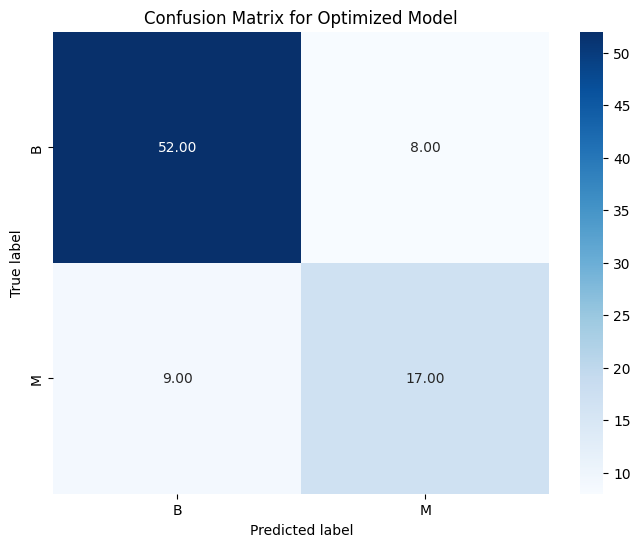

In [64]:
# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Calculate confusion matrix for the optimized model
cm_optimized = confusion_matrix(y_test, predictions_optimized)

# Plot confusion matrix for the optimized model
plot_confusion_matrix(cm_optimized, classes=['B', 'M'], normalize=False, title='Confusion Matrix for Optimized Model')

## Evaluate the models

### Make Predictions

In [58]:
# Make predictions using the test data
predictions_simple = simple_nn.predict(X_test)
predictions_optimized = optimized_nn.predict(X_test)


In [59]:
# Calculate and print accuracies
accuracy_simple = accuracy_score(y_test, predictions_simple)
accuracy_optimized = accuracy_score(y_test, predictions_optimized)

In [70]:
print(f"Accuracy of the simple model: {accuracy_simple:.2f}")
print(f"Accuracy of the optimized model: {accuracy_optimized:.2f}")

Accuracy of the simple model: 0.71
Accuracy of the optimized model: 0.80
